In [2]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import os

if not os.path.exists('./cache'):
    os.makedirs('./cache')

# 캐시 활성화
fastf1.Cache.enable_cache('./cache')

In [19]:
# 2. 세션 로드
session = fastf1.get_session(2021, 'Monza' , 'R')

print('데이터 다운로드중..')
session.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...


데이터 다운로드중..


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!

In [20]:
# 드라이버 객체 추출
## HAM vs VER

ver = session.laps.pick_drivers('VER').pick_fastest()
ham = session.laps.pick_drivers('HAM').pick_fastest()
lec = session.laps.pick_drivers('LEC').pick_fastest()

# 텔레메트리 추출
## 속도, RPM, 기어, 스로틀 수준
ver_tele = ver.get_car_data().add_distance()
ham_tele = ham.get_car_data().add_distance()
lec_tele = lec.get_car_data().add_distance()

print(f"VER 최고속도: {ver_tele['Speed'].max()} km/h")
print(f"HAM 최고속도: {ham_tele['Speed'].max()} km/h")
print(f"LEC 최고속도: {lec_tele['Speed'].max()} km/h")

VER 최고속도: 325.0 km/h
HAM 최고속도: 326.0 km/h
LEC 최고속도: 329.0 km/h


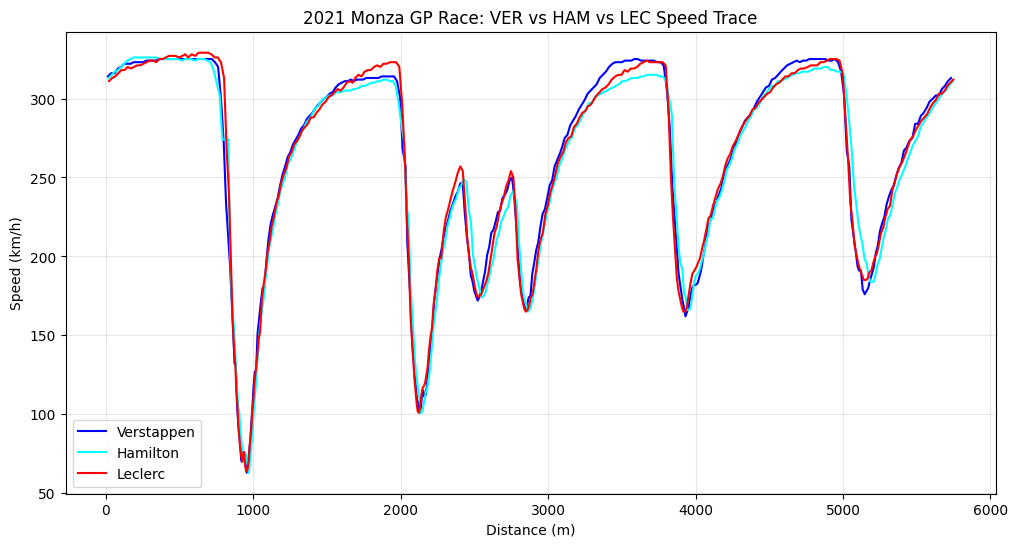

In [21]:
# 그래프 그리기
fastf1.plotting.setup_mpl()
plt.figure(figsize=(12, 6))

# 베르스타펜 (Red Bull 컬러)
plt.plot(ver_tele['Distance'], ver_tele['Speed'], label='Verstappen', color='blue')
# 해밀턴 (Mercedes 컬러)
plt.plot(ham_tele['Distance'], ham_tele['Speed'], label='Hamilton', color='cyan')
# 르끌레 (Ferrari)
plt.plot(lec_tele['Distance'], lec_tele['Speed'], label='Leclerc', color='red')

plt.title(f"2021 Monza GP Race: VER vs HAM vs LEC Speed Trace")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()